<a href="https://colab.research.google.com/github/Buckethead1472/TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_json ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')

In [ ]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_normalizado = pd.concat([df['customerID'], df['Churn'], df_customer, df_phone, df_internet, df_account], axis=1)

In [ ]:
df_normalizado.tail(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7257,9975-SKRNR,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9
7258,9978-HYCIN,No,Male,1,Yes,Yes,47,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),84.95,4018.05
7259,9979-RGMZT,No,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [ ]:
df_normalizado = df_normalizado.copy()

#🔧 Transformación

In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_normalizado.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [ ]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
#Iteramos en el dataset para inspeccionar los valores unicos de cada columna y tener una vista mas amplia de algunos datos sucios
for column in df_normalizado.columns:
    if df_normalizado[column].dtype == 'object':
        print(f"Columna '{column}': {df_normalizado[column].unique()}")
    else:
        print(f"Columna '{column}' (numérica): {df_normalizado[column].min()} - {df_normalizado[column].max()} (min - max)")

Columna 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'Churn': ['No' 'Yes' '']
Columna 'gender': ['Female' 'Male']
Columna 'SeniorCitizen' (numérica): 0 - 1 (min - max)
Columna 'Partner': ['Yes' 'No']
Columna 'Dependents': ['Yes' 'No']
Columna 'tenure' (numérica): 0 - 72 (min - max)
Columna 'PhoneService': ['Yes' 'No']
Columna 'MultipleLines': ['No' 'Yes' 'No phone service']
Columna 'InternetService': ['DSL' 'Fiber optic' 'No']
Columna 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Columna 'OnlineBackup': ['Yes' 'No' 'No internet service']
Columna 'DeviceProtection': ['No' 'Yes' 'No internet service']
Columna 'TechSupport': ['Yes' 'No' 'No internet service']
Columna 'StreamingTV': ['Yes' 'No' 'No internet service']
Columna 'StreamingMovies': ['No' 'Yes' 'No internet service']
Columna 'Contract': ['One year' 'Month-to-month' 'Two year']
Columna 'PaperlessBilling': ['Yes' 'No']
Columna 'PaymentMethod': ['Mailed check' 'El

In [ ]:
#reemplazamos los espacios vacios por NaN
df_normalizado['Churn'] = df_normalizado['Churn'].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Eliminamos las filas NaN
df_normalizado = df_normalizado.dropna(subset=['Churn'])

In [ ]:
#convertimos de tipo object a tipo float, los que tengan error seran transformados en NaN
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

In [ ]:
#Rellenamos los valores nulos con 0
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0)

In [ ]:
#creando la columna de facturacion diaria
df_normalizado['Charges.Daily'] = df_normalizado['Charges.Monthly'] / 30

In [ ]:
#redondeamos a 2 decimales
df_normalizado['Charges.Daily'] = df_normalizado['Charges.Daily'].round(2)

In [ ]:
# #estandarizamos los valores yes y no a 1 y 0
columnas = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in columnas:
    df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0})

    df_normalizado[col] = df_normalizado[col].astype(int)

print(df_normalizado[columnas].head())
print(df_normalizado[columnas].dtypes)

   Churn  Partner  Dependents  PhoneService  PaperlessBilling
0      0        1           1             1                 1
1      0        0           0             1                 0
2      1        0           0             1                 1
3      1        1           0             1                 1
4      1        1           0             1                 1
Churn               int64
Partner             int64
Dependents          int64
PhoneService        int64
PaperlessBilling    int64
dtype: object


/tmp/ipython-input-3627256020.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-3627256020.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-3627256020.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in 

In [ ]:
#Renombramos las columnas para mayor entendimiento
nombre_columna = ['ID_Cliente','dejo_empresa','genero','tercera_edad','pareja','dependientes','contrato_meses','subs_telefono','sub_mas_lineas','sub_internet','sub_seguridad','sub_respaldo','proteccion_adicional','soporte_tecnico','sub_streamingTV','sub_streamingMovies','tipo_contrato','factura_en_linea','forma_pago','facturacion_mensual','facturacion_total','facturacion_diario']
df_normalizado.columns = nombre_columna


In [ ]:
df_normalizado.head(5)

,ID_Cliente,dejo_empresa,genero,tercera_edad,pareja,dependientes,contrato_meses,subs_telefono,sub_mas_lineas,sub_internet,sub_seguridad,sub_respaldo,proteccion_adicional,soporte_tecnico,sub_streamingTV,sub_streamingMovies,tipo_contrato,factura_en_linea,forma_pago,facturacion_mensual,facturacion_total,facturacion_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   dejo_empresa          7043 non-null   int64  
 2   genero                7043 non-null   object 
 3   tercera_edad          7043 non-null   int64  
 4   pareja                7043 non-null   int64  
 5   dependientes          7043 non-null   int64  
 6   contrato_meses        7043 non-null   int64  
 7   subs_telefono         7043 non-null   int64  
 8   sub_mas_lineas        7043 non-null   object 
 9   sub_internet          7043 non-null   object 
 10  sub_seguridad         7043 non-null   object 
 11  sub_respaldo          7043 non-null   object 
 12  proteccion_adicional  7043 non-null   object 
 13  soporte_tecnico       7043 non-null   object 
 14  sub_streamingTV       7043 non-null   object 
 15  sub_streamingMovies   7043

In [ ]:
# Traducimos los valores de los registros con un diccionario

traduccion_valores = {
    'Yes': 'Sí',
    'No': 'No',
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años',
    'Fiber optic': 'Fibra óptica',
    'No internet service': 'Sin internet',
    'No phone service': 'Sin teléfono',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque enviado',
    'Bank transfer (automatic)': 'Transferencia (auto)',
    'Credit card (automatic)': 'Tarjeta (auto)'
}

df_normalizado = df_normalizado.replace(traduccion_valores)

print(df_normalizado['tipo_contrato'].unique())
print(df_normalizado['sub_internet'].unique())

['DSL' 'Fibra óptica' 'No']


#📊 Carga y análisis

In [ ]:
df_normalizado.describe()

,dejo_empresa,tercera_edad,pareja,dependientes,contrato_meses,subs_telefono,factura_en_linea,facturacion_mensual,facturacion_total,facturacion_diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [ ]:
df_normalizado.shape

(7043, 22)

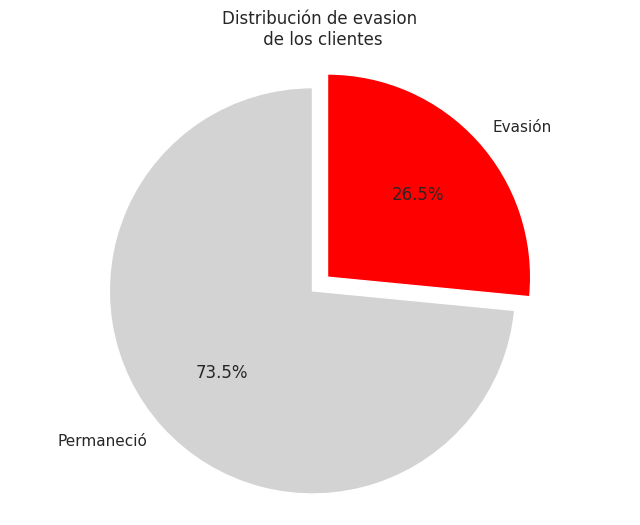

In [ ]:
import matplotlib.pyplot as plt

conteo = df_normalizado['dejo_empresa'].value_counts()
labels_personalizados = ['Permaneció', 'Evasión']

# 3. Crear gráfico de pastel
separacion = [0, 0.1]
plt.figure(figsize=(8, 6))
plt.pie(conteo, labels=labels_personalizados, autopct='%1.1f%%',explode = separacion,startangle=90, colors=['lightgray','red'])

# 4. Añadir título y ajustar
plt.title('Distribución de evasion\n de los clientes')
plt.axis('equal')
plt.show()

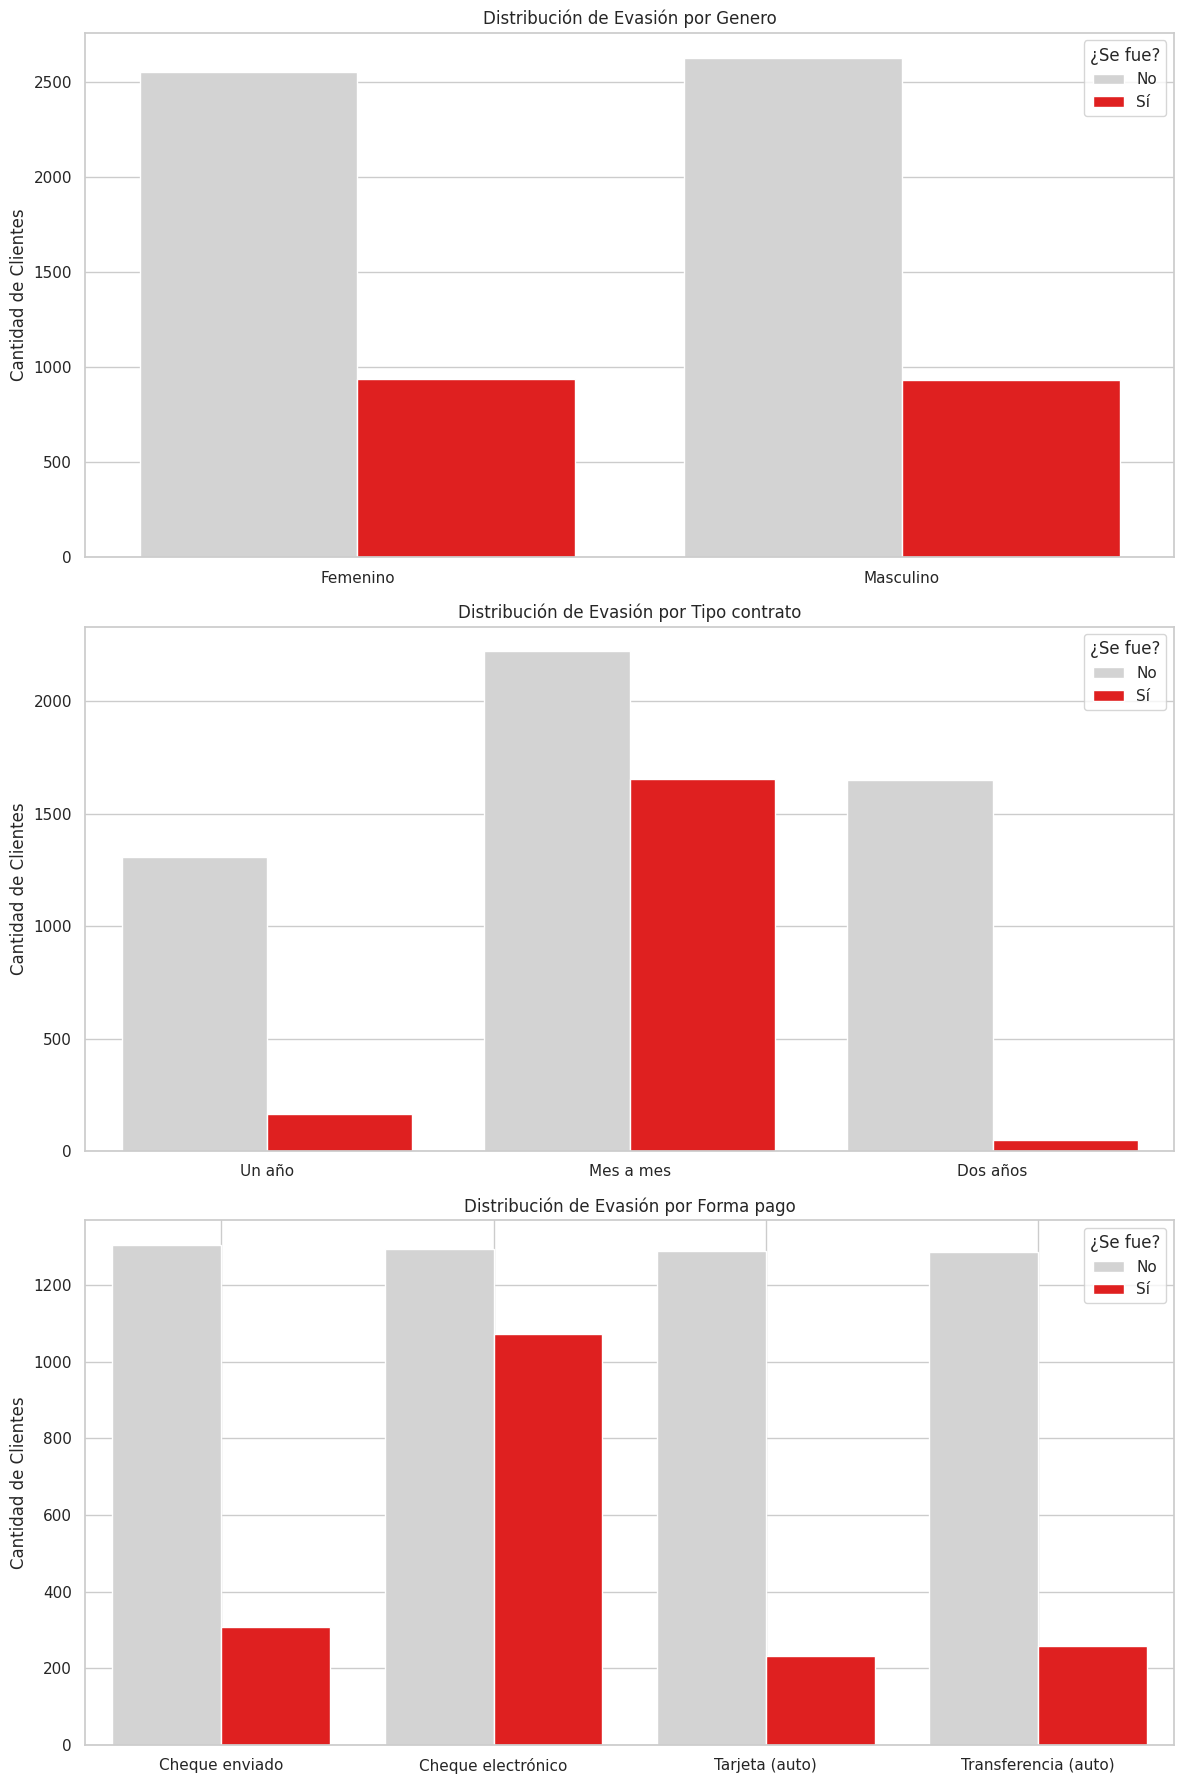

In [ ]:
import seaborn as sns

# columnas a analizar
columnas_analizar = ['genero', 'tipo_contrato', 'forma_pago']

# colores
colores = ['lightgray', 'red']

# creamos una figura con 3 subgraficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, col in enumerate(columnas_analizar):
    sns.countplot(x=col, hue='dejo_empresa', data=df_normalizado, ax=axes[i], palette=colores)
    axes[i].set_title(f'Distribución de Evasión por {col.replace("_", " ").capitalize()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad de Clientes')
    axes[i].legend(title='¿Se fue?', labels=['No', 'Sí'])

plt.tight_layout()
plt.grid(True)
plt.show()

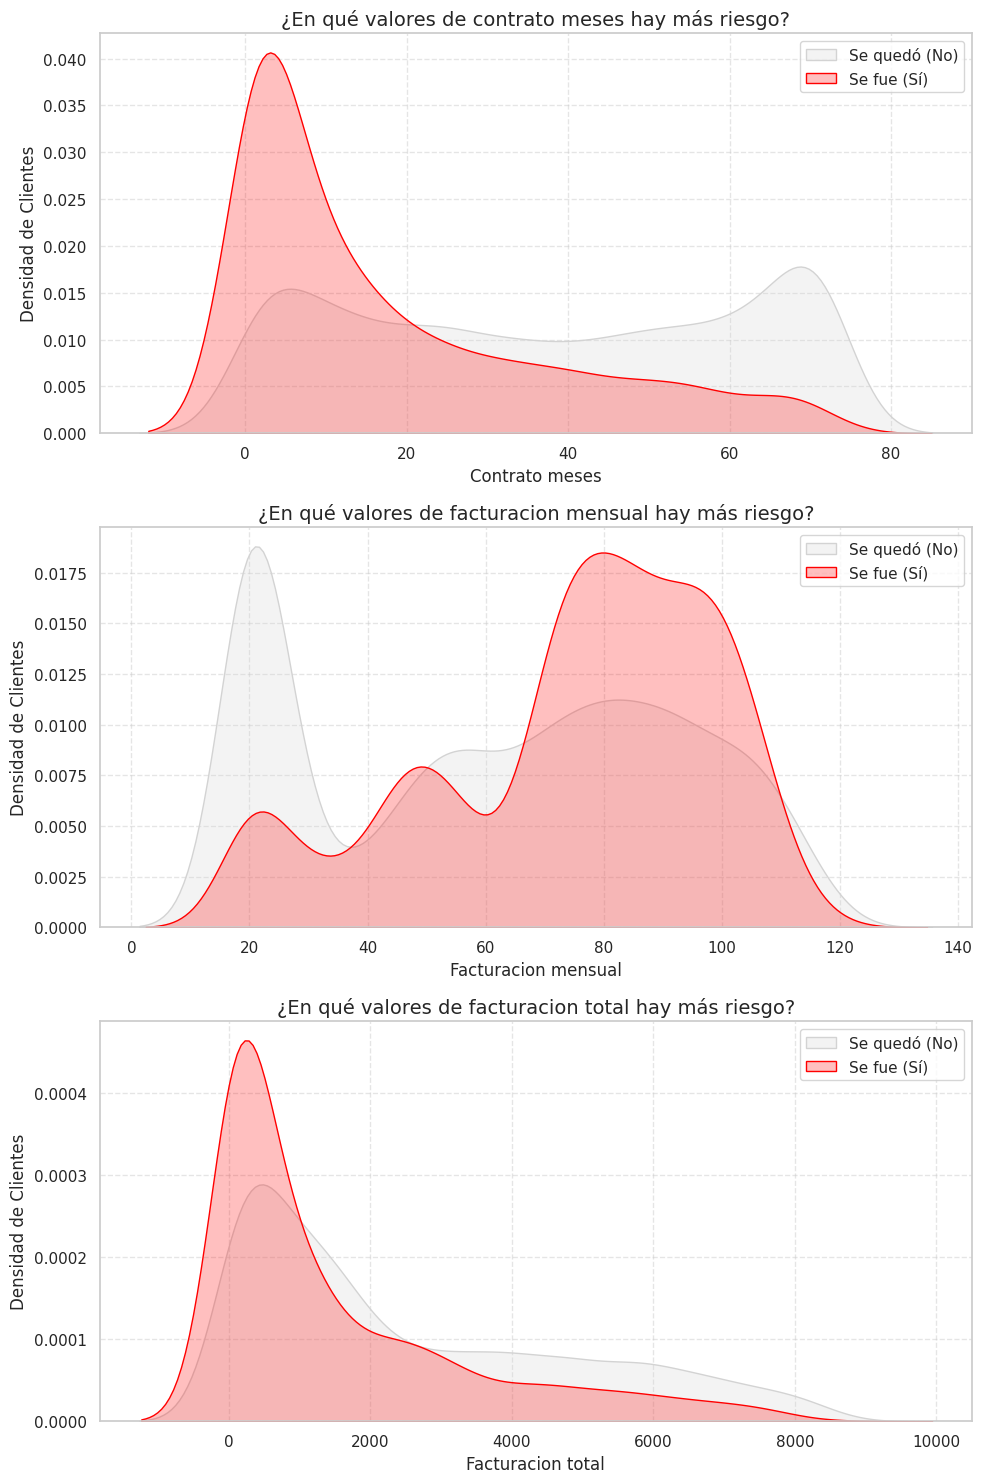

In [ ]:
# columnas
columnas_num = ['contrato_meses', 'facturacion_mensual', 'facturacion_total']

# 2. Creamos la figura
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i, col in enumerate(columnas_num):
    # Graficamos los que se quedaron, representados por el 0
    sns.kdeplot(data=df_normalizado[df_normalizado['dejo_empresa'] == 0],
                x=col, fill=True, color='lightgray', label='Se quedó (No)', ax=axes[i])

    # Graficamos los que se fueron, representados por el 1
    sns.kdeplot(data=df_normalizado[df_normalizado['dejo_empresa'] == 1],
                x=col, fill=True, color='red', label='Se fue (Sí)', ax=axes[i])

    axes[i].set_title(f'¿En qué valores de {col.replace("_", " ")} hay más riesgo?', fontsize=14)
    axes[i].set_xlabel(col.replace("_", " ").capitalize())
    axes[i].set_ylabel('Densidad de Clientes')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

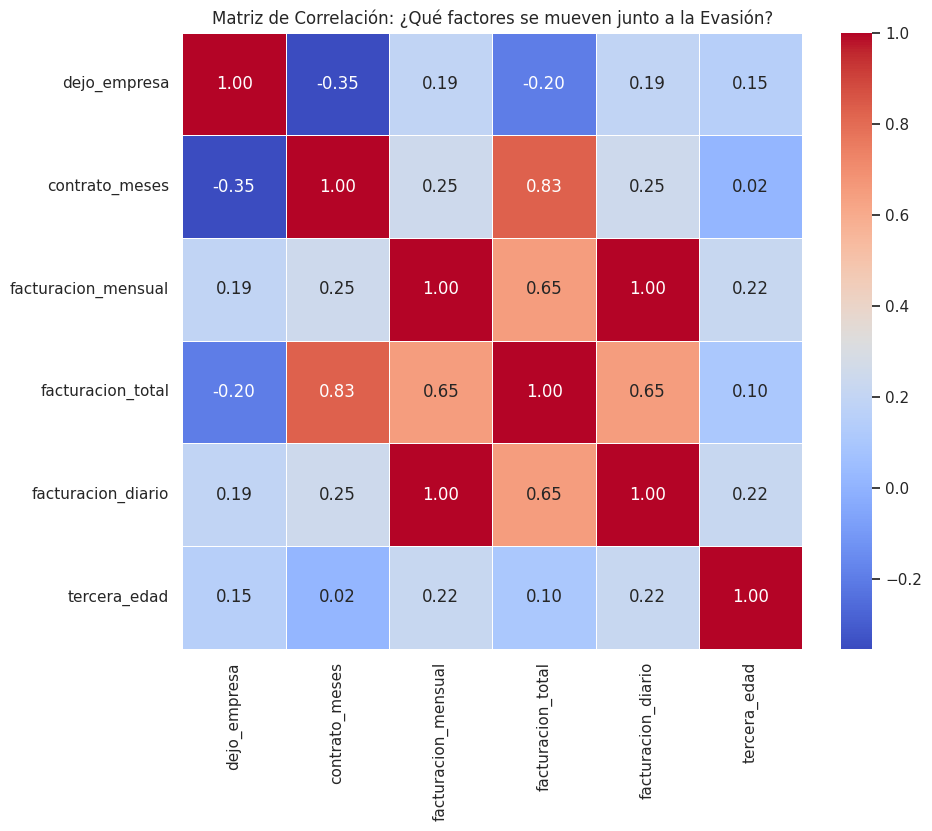

In [ ]:
# Seleccionamos las variables numéricas clave para el mapa
# Incluimos tu nueva columna 'facturacion_diario'
cols_analisis = ['dejo_empresa', 'contrato_meses', 'facturacion_mensual',
                 'facturacion_total', 'facturacion_diario', 'tercera_edad']

plt.figure(figsize=(10, 8))
# Calculamos la correlación
matriz_corr = df_normalizado[cols_analisis].corr()

# Dibujamos el Heatmap
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación: ¿Qué factores se mueven junto a la Evasión?')
plt.show()

#📄Informe final

##**1. Introducción**

El presente análisis tiene como objetivo identificar los factores críticos que impulsan la pérdida de clientes en Telecom X. La empresa ha detectado una tasa de evasión inusual y requiere un diagnóstico basado en datos para diseñar estrategias de retención efectivas. El problema central es entender por qué el 26.5% de los clientes deciden abandonar el servicio.

##  **2. Limpieza y Tratamiento de Datos**

Para garantizar la calidad de los resultados, se realizó un proceso de ETL que incluyó:


*   **Importación:** Extracción de datos desde una API en formato JSON.

*   **Tratamiento de Nulos:** Se identificaron y corrigieron valores vacíos en la facturación total y estados de evasión, asegurando la integridad de los 7,043 registros.

*   **Estandarización:** Traducción de columnas al español para mejorar la interpretabilidad.

*   **Transformación de Tipos:** Conversión de variables categóricas ("Sí"/"No") a formatos binarios (1/0) y variables financieras a tipo float.
*   **Creacion de metricas:** Creación de la métrica facturacion_diaria para entender el consumo a nivel micro.

## **3. Análisis Exploratorio de Datos (EDA)**

A través de la visualización, identificamos patrones clave:


*   **Distribución de Evasión:** El gráfico de pastel confirmó que el 26.5% de los clientes son desertores, una cifra alta para la industria.

*   **Análisis:** Los clientes con contrato "mes a mes" presentan la tasa de fuga más alta (aprox. 42%), mientras que los contratos a 2 años son los más estables.

*   **Métodos de Pago:** Se detectó una correlación fuerte entre el uso de "Cheque Electrónico" y la evasión.

*   **Análisis Numérico:** El gráfico de densidad  reveló un "pico de deserción temprana" el riesgo de fuga es máximo durante los primeros 5 a 10 meses de contrato

*   Los clientes con cargos mensuales altos (segmento premium) son más propensos a irse que los de planes básicos.

## **4. Conclusiones e Insights**





1.   **Vulnerabilidad Inicial:** La empresa pierde a la mayoría de sus clientes antes de que estos cumplan el primer año.

1.   **Inestabilidad Contractual:** El modelo de negocio "Mes a mes" facilita la salida de clientes ante cualquier oferta de la competencia.

2.   **Barreras de Salida Inexistentes:** El género no influye, pero el tipo de servicio de internet sí (la fibra óptica, a pesar der veloz, muestra una rotación considerable).


1.   **Correlación**: El análisis de correlación y densidad confirma que la antigüedad es el factor determinante. Los clientes se van masivamente antes de cumplir los 10 meses. Además, existe una relación directa entre el costo mensual y la fuga; los clientes que pagan más de la media ($64.76) son más volátiles.








## **5. Recomendaciones Estratégicas**

*   **Programa de bienvenida:** Implementar beneficios exclusivos o descuentos durante los primeros 6 meses para superar la curva crítica de deserción temprana.

*   **Incentivos de Migración Contractual:** Ofrecer bonos de velocidad o servicios adicionales gratuitos a los clientes que migren de contrato "Mes a mes" a contratos anuales.

*   **Revisión de la Experiencia Digital:** Investigar por qué los usuarios de "Cheque Electrónico" se van más. ¿Es un fallo en la plataforma de pagos o un perfil de cliente más volátil?

*   **Plan de Retención Premium:** Crear un equipo de fidelización para clientes con facturación mensual mayor a $70, ya que representan el mayor riesgo de pérdida de ingresos.

